In [1]:
import sys
print('python: {}'.format(sys.version))

python: 3.12.3 (tags/v3.12.3:f6650f9, Apr  9 2024, 14:05:25) [MSC v.1938 64 bit (AMD64)]


In [4]:
import scipy
print('scipy: {}'.format(scipy.__version__))

scipy: 1.13.0


In [5]:
import numpy
print('numpy: {}'.format(numpy.__version__))

numpy: 1.26.4


In [6]:
import pandas
print('pandas: {}'.format(pandas.__version__))

pandas: 2.2.2


In [7]:
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))

matplotlib: 3.9.0


In [8]:
import sklearn
print('sklearn: {}'.format(sklearn.__version__))

sklearn: 1.5.0


In [22]:
import pandas
from pandas.plotting import scatter_matrix

import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier

from sklearn.neighbors import KNeighborsClassifier

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.naive_bayes import GaussianNB

from sklearn.svm import SVC

In [23]:
url ="https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['special-length','sepal-width','petal-lengh','petal-width','class']
dataset = pandas.read_csv(url,names = names)

In [24]:
print(dataset)

     special-length  sepal-width  petal-lengh  petal-width           class
0               5.1          3.5          1.4          0.2     Iris-setosa
1               4.9          3.0          1.4          0.2     Iris-setosa
2               4.7          3.2          1.3          0.2     Iris-setosa
3               4.6          3.1          1.5          0.2     Iris-setosa
4               5.0          3.6          1.4          0.2     Iris-setosa
..              ...          ...          ...          ...             ...
145             6.7          3.0          5.2          2.3  Iris-virginica
146             6.3          2.5          5.0          1.9  Iris-virginica
147             6.5          3.0          5.2          2.0  Iris-virginica
148             6.2          3.4          5.4          2.3  Iris-virginica
149             5.9          3.0          5.1          1.8  Iris-virginica

[150 rows x 5 columns]


In [26]:
print(dataset.head(10))

   special-length  sepal-width  petal-lengh  petal-width        class
0             5.1          3.5          1.4          0.2  Iris-setosa
1             4.9          3.0          1.4          0.2  Iris-setosa
2             4.7          3.2          1.3          0.2  Iris-setosa
3             4.6          3.1          1.5          0.2  Iris-setosa
4             5.0          3.6          1.4          0.2  Iris-setosa
5             5.4          3.9          1.7          0.4  Iris-setosa
6             4.6          3.4          1.4          0.3  Iris-setosa
7             5.0          3.4          1.5          0.2  Iris-setosa
8             4.4          2.9          1.4          0.2  Iris-setosa
9             4.9          3.1          1.5          0.1  Iris-setosa


In [29]:

print(dataset.describe())

       special-length  sepal-width  petal-lengh  petal-width
count      150.000000   150.000000   150.000000   150.000000
mean         5.843333     3.054000     3.758667     1.198667
std          0.828066     0.433594     1.764420     0.763161
min          4.300000     2.000000     1.000000     0.100000
25%          5.100000     2.800000     1.600000     0.300000
50%          5.800000     3.000000     4.350000     1.300000
75%          6.400000     3.300000     5.100000     1.800000
max          7.900000     4.400000     6.900000     2.500000


In [31]:
#Class

print(dataset.groupby('class').size())

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


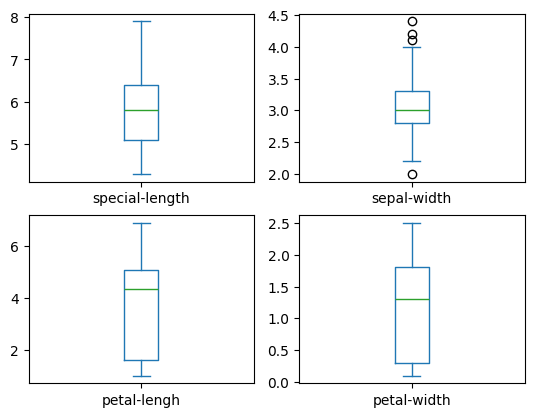

In [32]:
# Uni

dataset.plot(kind = 'box',subplots = True,layout=(2,2), sharex=False, sharey = False)
plt.show()

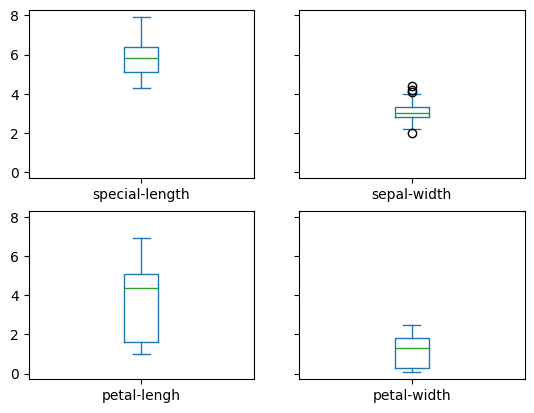

In [33]:
# Uni

dataset.plot(kind = 'box',subplots = True, layout=(2,2), sharex=True, sharey = True)
plt.show()

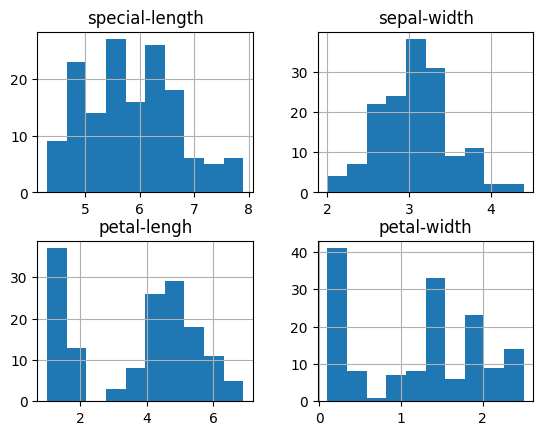

In [34]:
# Histogramm

dataset.hist()
plt.show()

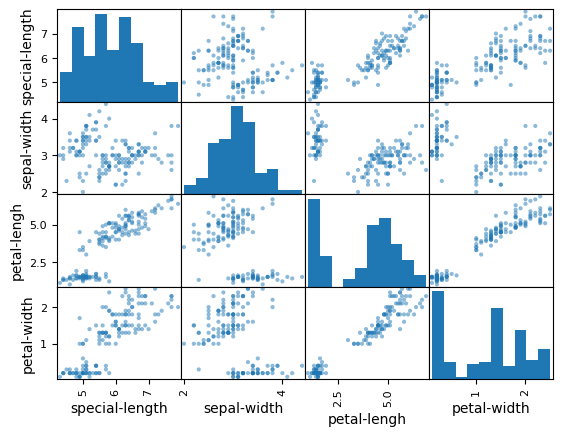

In [35]:
scatter_matrix(dataset)
plt.show()

In [37]:
array = dataset.values
x = array[:,0:4]
y = array[:,4]
validation_size = 0.20
seed = 6
x_train, x_test, y_train, y_test = model_selection.train_test_split(x,y,test_size = validation_size,random_state = seed)

In [38]:
seed = 6
scoring = 'accuracy'

In [46]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=seed)
    cv_results = model_selection.cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.958333 (0.041667)
LDA: 0.975000 (0.038188)
KNN: 0.958333 (0.041667)
CART: 0.941667 (0.053359)
NB: 0.966667 (0.040825)
SVM: 0.941667 (0.053359)


In [ ]:
# 1. Linear Regression Algorithm

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error

disease = datasets.load_diabetes()

# print(disease)

disease_x = disease.data
# Split Data
disease_x_train = disease_x[:-30]
disease_x_test = disease_x[-20:]

disease_y_train = disease.target[:-30]
disease_y_test = disease.target[-20:]

# Generate model

reg = linear_model.LinearRegression()
reg.fit(disease_x_train, disease_y_train)

y_predict = reg.predict(disease_x_test)

accuracy = mean_squared_error(disease_y_test, y_predict)

print(accuracy)

weights = reg.coef_
intercept = reg.intercept_
print(weights, intercept)

2004.2629212944946
[  -1.16678648 -237.18123633  518.31283524  309.04204042 -763.10835067
  458.88378916   80.61107395  174.31796962  721.48087773   79.1952801 ] 153.05824267739402


2004.5186863342092
[ 3.06094248e-01 -2.37635570e+02  5.10538048e+02  3.27729878e+02
 -8.14111926e+02  4.92799595e+02  1.02841240e+02  1.84603496e+02
  7.43509388e+02  7.60966464e+01] 152.76429169049118


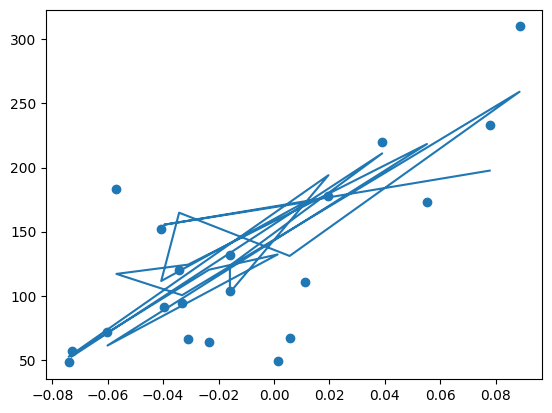

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error

disease = datasets.load_diabetes()

# print(disease)

disease_x = disease.data
# Split Data
disease_x_train = disease_x[:-20]
disease_x_test = disease_x[-20:]

disease_y_train = disease.target[:-20]
disease_y_test = disease.target[-20:]

# Generate model

reg = linear_model.LinearRegression()
reg.fit(disease_x_train, disease_y_train)

y_predict = reg.predict(disease_x_test)

accuracy = mean_squared_error(disease_y_test, y_predict)

print(accuracy)

weights = reg.coef_
intercept = reg.intercept_
print(weights, intercept)

plt.scatter(disease_x_test[:, 2], disease_y_test)
plt.plot(disease_x_test[:, 2], y_predict)
plt.show()

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

cars = pd.read_csv("cars.csv")
print(cars.head())
print(cars.columns)



          Unnamed: 0   mpg  cyl   disp   hp  drat     wt   qsec  vs  am  gear  \
0          Mazda RX4  21.0    6  160.0  110  3.90  2.620  16.46   0   1     4   
1      Mazda RX4 Wag  21.0    6  160.0  110  3.90  2.875  17.02   0   1     4   
2         Datsun 710  22.8    4  108.0   93  3.85  2.320  18.61   1   1     4   
3     Hornet 4 Drive  21.4    6  258.0  110  3.08  3.215  19.44   1   0     3   
4  Hornet Sportabout  18.7    8  360.0  175  3.15  3.440  17.02   0   0     3   

   carb  
0     4  
1     4  
2     1  
3     1  
4     2  
Index(['Unnamed: 0', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs',
       'am', 'gear', 'carb'],
      dtype='object')


<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

          Unnamed: 0   mpg  cyl   disp   hp  drat     wt   qsec  vs  am  gear  \
0          Mazda RX4  21.0    6  160.0  110  3.90  2.620  16.46   0   1     4   
1      Mazda RX4 Wag  21.0    6  160.0  110  3.90  2.875  17.02   0   1     4   
2         Datsun 710  22.8    4  108.0   93  3.85  2.320  18.61   1   1     4   
3     Hornet 4 Drive  21.4    6  258.0  110  3.08  3.215  19.44   1   0     3   
4  Hornet Sportabout  18.7    8  360.0  175  3.15  3.440  17.02   0   0     3   

   carb  
0     4  
1     4  
2     1  
3     1  
4     2  
Index(['Unnamed: 0', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs',
       'am', 'gear', 'carb'],
      dtype='object')


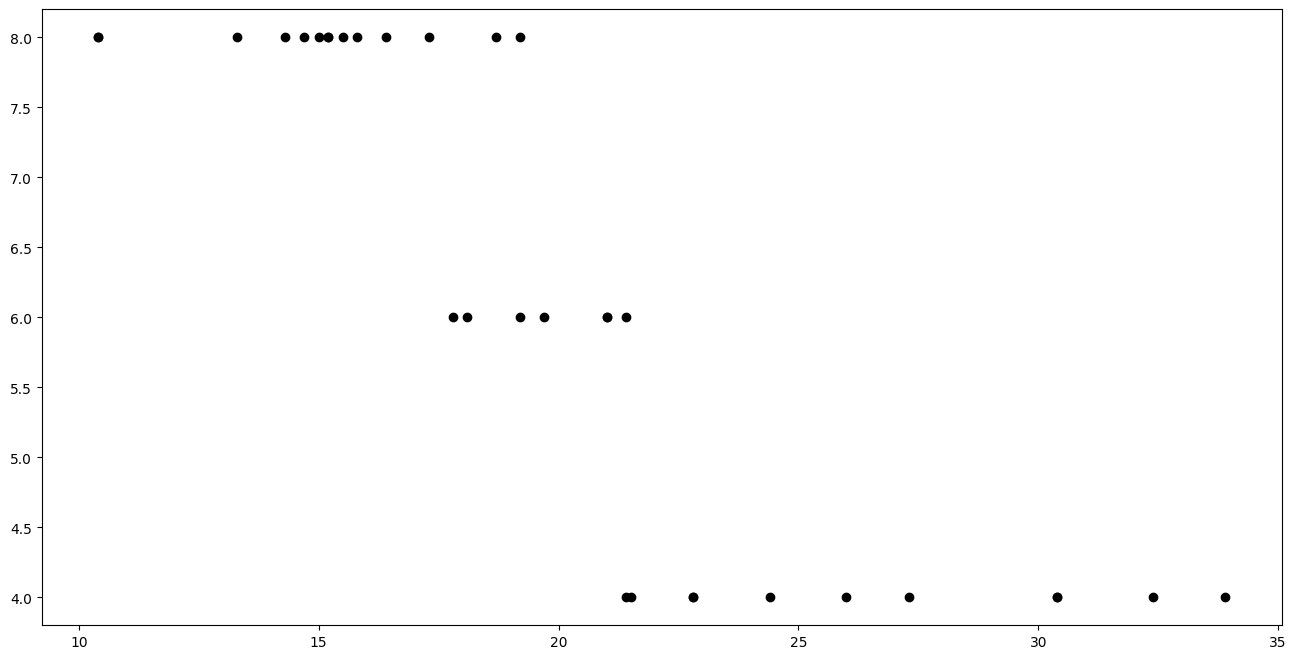

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

cars = pd.read_csv("cars.csv")
print(cars.head())
print(cars.columns)

plt.figure(figsize = (16,8))
plt.scatter(
    cars['mpg'],
    cars['cyl'],
    c = 'black'
)

plt.xlabel = ("mpg")
plt.ylabel = ("cyl")
plt.show()

          Unnamed: 0   mpg  cyl   disp   hp  drat     wt   qsec  vs  am  gear  \
0          Mazda RX4  21.0    6  160.0  110  3.90  2.620  16.46   0   1     4   
1      Mazda RX4 Wag  21.0    6  160.0  110  3.90  2.875  17.02   0   1     4   
2         Datsun 710  22.8    4  108.0   93  3.85  2.320  18.61   1   1     4   
3     Hornet 4 Drive  21.4    6  258.0  110  3.08  3.215  19.44   1   0     3   
4  Hornet Sportabout  18.7    8  360.0  175  3.15  3.440  17.02   0   0     3   

   carb  
0     4  
1     4  
2     1  
3     1  
4     2  
Index(['Unnamed: 0', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs',
       'am', 'gear', 'carb'],
      dtype='object')


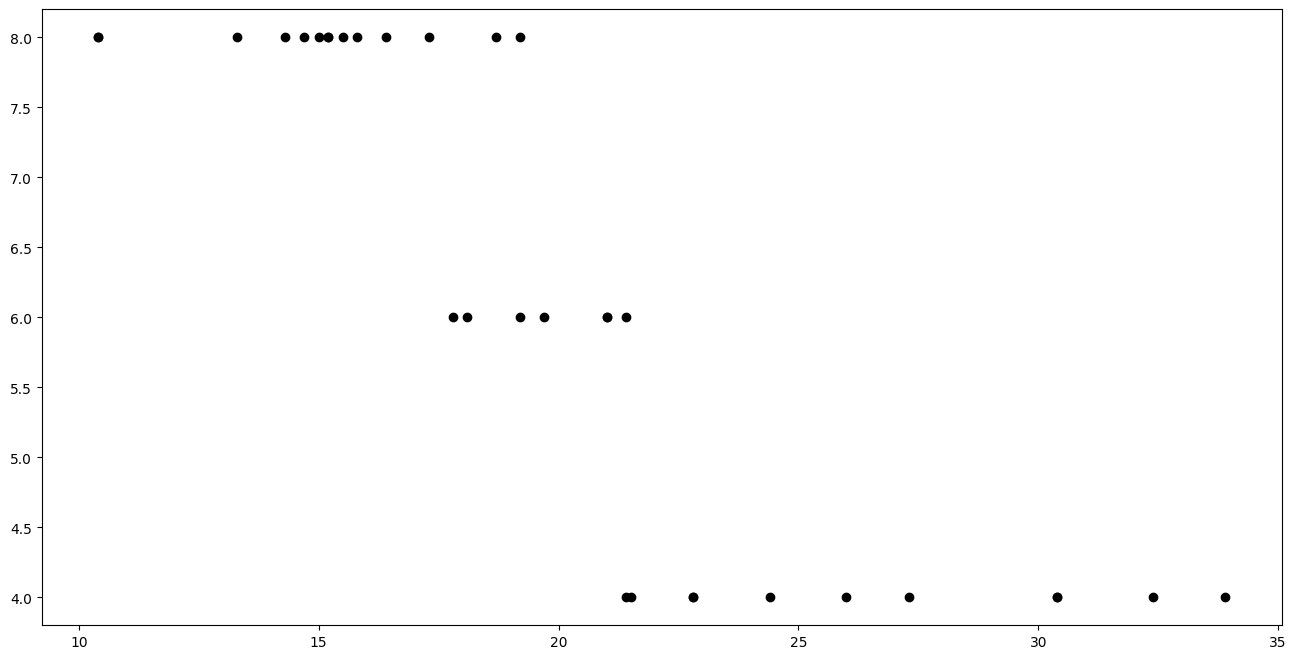

Fit Line
-0.2525149506667544
11.260683180739264


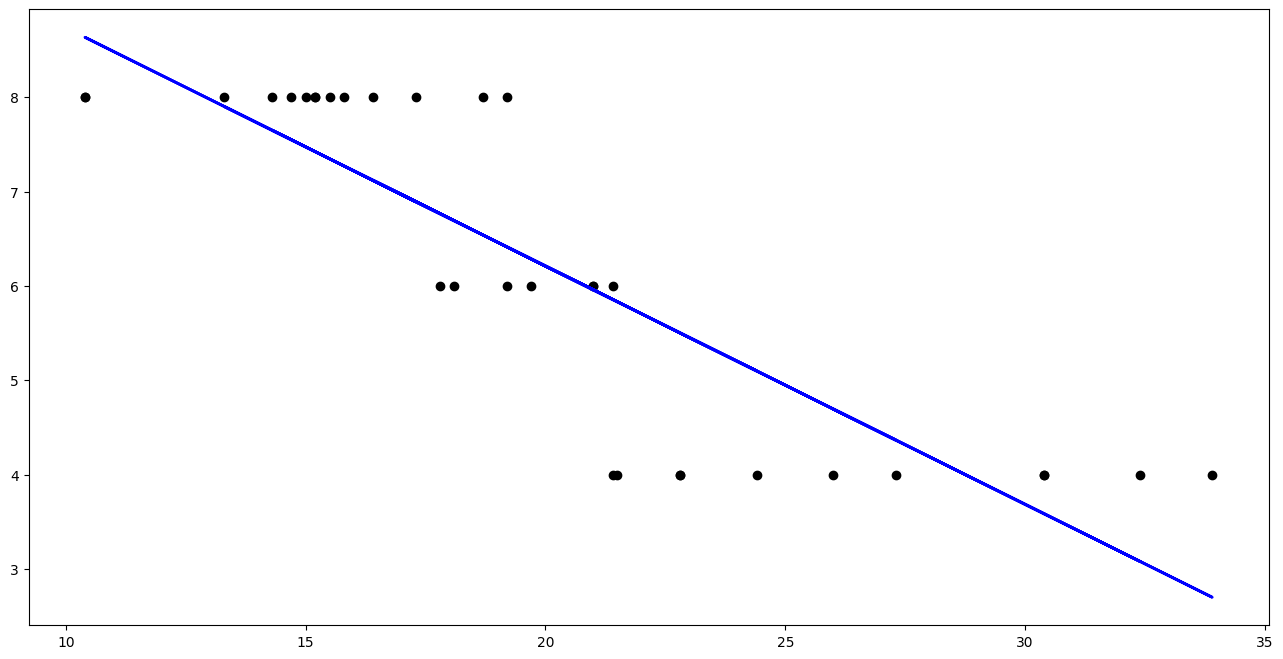

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

cars = pd.read_csv("cars.csv")
print(cars.head())
print(cars.columns)

plt.figure(figsize = (16,8))
plt.scatter(
    cars['mpg'],
    cars['cyl'],
    c = 'black'
)

plt.xlabel = ("mpg")
plt.ylabel = ("cyl")
plt.show()

print('Fit Line')

x = cars['mpg'].values.reshape(-1,1)
y = cars['cyl'].values.reshape(-1,1)

reg = LinearRegression()

reg.fit(x,y)

print(reg.coef_[0][0])
print(reg.intercept_[0])

predictions = reg.predict(x)

plt.figure(figsize = (16,8))
plt.scatter(
    cars['mpg'],
    cars['cyl'],
    c = 'black'
)
plt.plot(
     cars['mpg'],
    predictions,
    c = 'blue',
    linewidth = 2
)
plt.title = ("fit Line")
plt.xlabel = ("mpg")
plt.ylabel = ("cyl")
plt.show()
